c:\Users\Dilfina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


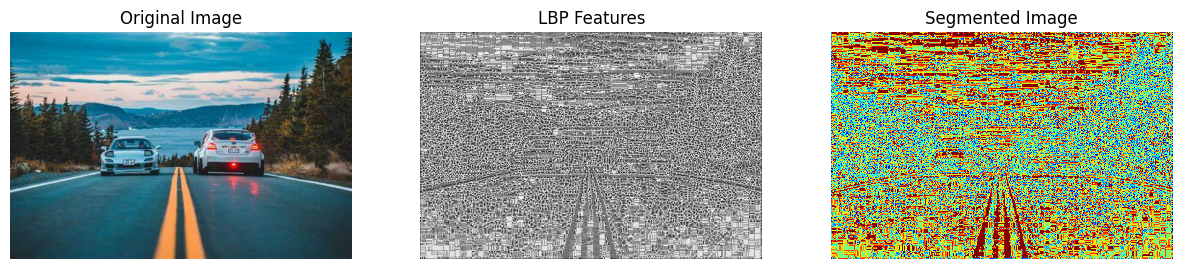

In [1]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Parameters for LBP
radius = 1  # Radius of the circle
n_points = 8 * radius  # Number of points on the circle
method = "uniform"  # Use uniform LBP patterns

# Step 1: Load and preprocess the image
image = cv2.imread(r"C:\Users\Dilfina\OneDrive\Desktop\image\sem lab\OIP.jpeg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Compute LBP features
lbp = local_binary_pattern(gray_image, n_points, radius, method)

# Step 3: Flatten the LBP features for clustering
lbp_flat = lbp.flatten().reshape(-1, 1)

# Step 4: Perform k-means clustering to segment the image
n_clusters = 3  # Number of texture regions
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
labels = kmeans.fit_predict(lbp_flat)

# Step 5: Reshape the labels to match the image dimensions
segmented_image = labels.reshape(gray_image.shape)

# Visualize the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(lbp, cmap="gray")
ax[1].set_title("LBP Features")
ax[1].axis("off")

ax[2].imshow(segmented_image, cmap="jet")
ax[2].set_title("Segmented Image")
ax[2].axis("off")

plt.show()


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Number of training images: 1027
Number of validation images: 256


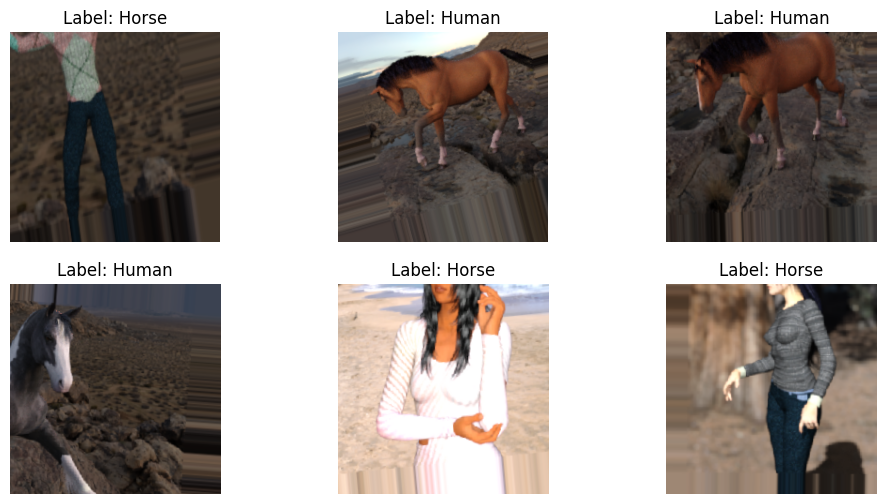

Epoch 1/10


c:\Users\Dilfina\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.5057 - loss: 0.8535 - val_accuracy: 0.5000 - val_loss: 0.7915
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.5676 - loss: 0.6936 - val_accuracy: 0.7578 - val_loss: 0.6203
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.5511 - loss: 0.6910 - val_accuracy: 0.5000 - val_loss: 0.7411
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.5698 - loss: 0.6736 - val_accuracy: 0.5430 - val_loss: 0.6730
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.5911 - loss: 0.6605 - val_accuracy: 0.5000 - val_loss: 0.8473
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.5949 - loss: 0.6531 - val_accuracy: 0.5625 - val_loss: 0.6952
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.6275 - loss: 0.6414 - val_accuracy: 0.5312 - val_loss: 0.7655
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.6277 - loss: 0.6377 - val_accuracy: 0.5469 - val_loss: 0.7831
Epo

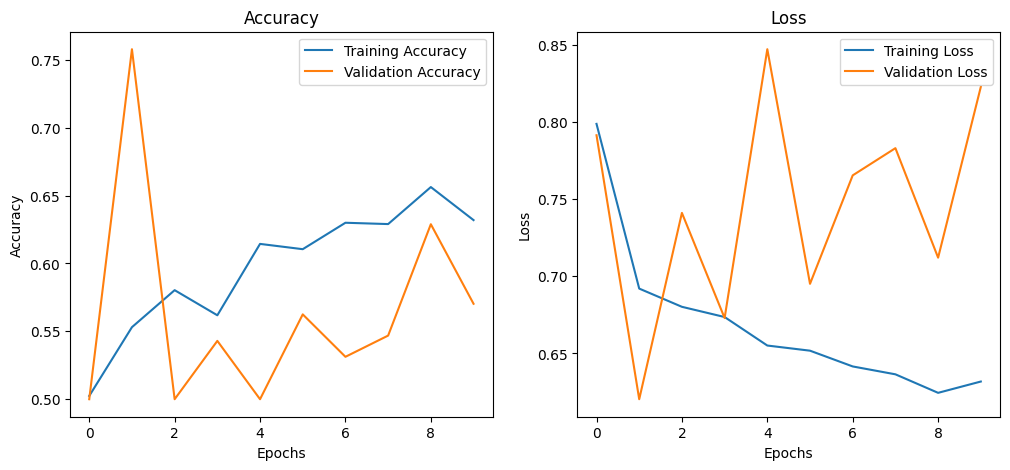

Final Training Accuracy: 0.63
Final Validation Accuracy: 0.57


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os


# Set dataset paths
train_dir = r'C:\Users\Dilfina\OneDrive\Desktop\image\sem lab\horse-or-human\train'        # Replace with the path to the 'train' folder
validation_dir = r'C:\Users\Dilfina\OneDrive\Desktop\image\sem lab\horse-or-human\validation'  # Replace with the path to the 'validation' folder

# Image data generators for preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Load the datasets
train_data = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='binary'
)

validation_data = validation_datagen.flow_from_directory(
    validation_dir, 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='binary'
)

# View the number of training and validation images
print(f"Number of training images: {train_data.samples}")
print(f"Number of validation images: {validation_data.samples}")

# Plot a few training images
def plot_images(data, num_images=6):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        img, label = data[i]
        plt.subplot(2, 3, i + 1)
        plt.imshow(img[0])
        plt.title(f"Label: {'Horse' if label[0] == 1 else 'Human'}")
        plt.axis("off")
    plt.show()

plot_images(train_data)

# Load ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model layers

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, validation_data=validation_data, epochs=10)

# Save the model for future use
model.save('horse_human_classifier.h5')

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Final training and validation accuracy
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {train_acc:.2f}")
print(f"Final Validation Accuracy: {val_acc:.2f}")



